In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from scipy.spatial.distance import cosine
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
model_path = '/content/drive/MyDrive/WORKS/FACIAL RECOGNITION RESEARCH]/data/ExtractedTerravicDatabase_subset/embedding_model.keras'
embedding_model = tf.keras.models.load_model(model_path)

In [ ]:
def extract_embeddings(model, image_path):
    preprocessed_image = preprocess_image(image_path)
    embeddings = model.predict(preprocessed_image)
    return embeddings.flatten()  # Flatten to 1D array


In [ ]:
def recognize_face(known_embeddings, test_embedding, threshold=0.5):
    known_embeddings = np.array(known_embeddings).reshape(len(known_embeddings), -1)  # Reshape known embeddings to 2D
    test_embedding = test_embedding.reshape(1, -1)  # Reshape test embedding to 2D
    similarities = cosine_similarity(known_embeddings, test_embedding)
    max_similarity = np.max(similarities)
    if max_similarity >= threshold:
        return True, max_similarity
    else:
        return False, max_similarity


In [ ]:
def preprocess_image(image_path):
    # Load image and convert to RGB
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Resize image to the input size required by the model
    image = cv2.resize(image, (96, 72))  # Correcting the order of dimensions
    # Normalize the image
    image = image / 255.0
    # Expand dimensions to match the input shape of the model
    image = np.expand_dims(image, axis=0)
    return image

In [ ]:
# Example known faces and their embeddings
known_face_paths = ['/content/drive/MyDrive/WORKS/FACIAL RECOGNITION RESEARCH]/data/processed/thermal-face-128x128/1-TD-A-0.jpg', '/content/drive/MyDrive/WORKS/FACIAL RECOGNITION RESEARCH]/data/processed/thermal-face-128x128/1-TD-A-1.jpg']


In [ ]:
# Extract embeddings for known faces
known_embeddings = [extract_embeddings(embedding_model, path) for path in known_face_paths]

# Test image
test_image_path = '/content/drive/MyDrive/WORKS/FACIAL RECOGNITION RESEARCH]/data/processed/thermal-face-128x128/1-TD-A-2.jpg'  # Replace with the path to the test image
test_embedding = extract_embeddings(embedding_model, test_image_path)

# Recognize the face
recognized, similarity = recognize_face(known_embeddings, test_embedding)
if recognized:
    print(f"Face recognized with similarity: {similarity}")
else:
    print("Face not recognized")

1/1 [==============================] - 0s 102ms/step
Face recognized with similarity: 0.8551101088523865


In [ ]:
def calculate_recognition_rate(model, test_dataset):
    correct_recognitions = 0
    total_tests = len(test_dataset)

    for test_image, label in test_dataset:
        test_embedding = extract_embeddings(model, test_image)
        recognized, _ = recognize_face(known_embeddings, test_embedding)
        if recognized:
            correct_recognitions += 1

    recognition_rate = (correct_recognitions / total_tests) * 100
    return recognition_rate

# test_dataset is a list of tuples (test_image_path, label)
test_dataset = [('/content/drive/MyDrive/WORKS/FACIAL RECOGNITION RESEARCH]/data/processed/thermal-face-128x128/1-TD-E-5.jpg', 'label1'), ('/content/drive/MyDrive/WORKS/FACIAL RECOGNITION RESEARCH]/data/processed/thermal-face-128x128/1-TD-A-2.jpg', 'label2')]
recognition_rate = calculate_recognition_rate(embedding_model, test_dataset)
print(f"Recognition Rate: {recognition_rate}%")


1/1 [==============================] - 0s 95ms/step
Recognition Rate: 50.0%


In [ ]:
def calculate_recognition_rate(model, test_dataset):
    correct_recognitions = 0
    total_tests = len(test_dataset)

    for test_image, label in test_dataset:
        test_embedding = extract_embeddings(model, test_image)
        recognized, _ = recognize_face(known_embeddings, test_embedding)
        if recognized:
            correct_recognitions += 1

    recognition_rate = (correct_recognitions / total_tests) * 100
    return recognition_rate

# Assuming test_dataset is a list of tuples (test_image_path, label)
test_dataset = [('/content/drive/MyDrive/WORKS/FACIAL RECOGNITION RESEARCH]/data/processed/thermal-face-128x128/10-TD-A-4.jpg', 'label1'), ('/content/drive/MyDrive/WORKS/FACIAL RECOGNITION RESEARCH]/data/processed/thermal-face-128x128/10-TD-E-1.jpg', 'label2')]
recognition_rate = calculate_recognition_rate(embedding_model, test_dataset)
print(f"Recognition Rate: {recognition_rate}%")

1/1 [==============================] - 0s 109ms/step
Recognition Rate: 100.0%


In [ ]:
!pip install mtcnn # Install the mtcnn module

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.3 MB/s eta 0:00:00


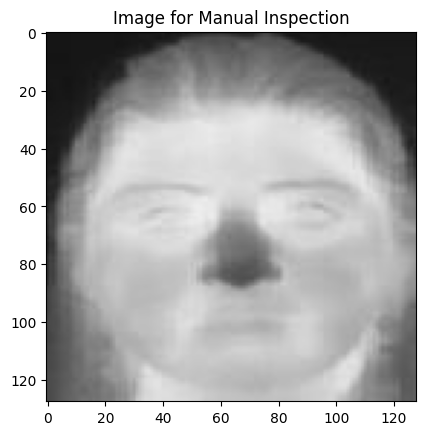

In [ ]:
def visualize_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title("Image for Manual Inspection")
    plt.show()

# Test with an example image
test_image_path = '/content/drive/MyDrive/WORKS/FACIAL RECOGNITION RESEARCH]/data/processed/thermal-face-128x128/10-TD-A-4.jpg'  # Replace with the path to the test image
visualize_image(test_image_path)


In [ ]:
# Function to preprocess the image
def preprocess_image(image_path, required_size=(96, 72)):
    # Load image and convert to RGB
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Resize image to the input size required by the model
    image = cv2.resize(image, required_size)
    # Normalize the image
    image = image / 255.0
    # Expand dimensions to match the input shape of the model
    image = np.expand_dims(image, axis=0)
    return image

In [ ]:
# Function to extract embeddings
def extract_embeddings(model, image_path):
    preprocessed_image = preprocess_image(image_path)
    embeddings = model.predict(preprocessed_image)
    return embeddings.flatten()  # Flatten to 1D array

In [ ]:
# Load the model
model_path = '/content/drive/MyDrive/WORKS/FACIAL RECOGNITION RESEARCH]/data/ExtractedTerravicDatabase_subset/embedding_model.keras'
embedding_model = tf.keras.models.load_model(model_path)

In [ ]:
# Test image
test_image_path = '/content/drive/MyDrive/WORKS/FACIAL RECOGNITION RESEARCH]/data/processed/thermal-face-128x128/10-TD-A-4.jpg'  # Path to the provided thermal face image
embeddings = extract_embeddings(embedding_model, test_image_path)

if embeddings is not None:
    print("Embeddings extracted successfully")
else:
    print("Failed to extract embeddings")

1/1 [==============================] - 1s 1s/step
Embeddings extracted successfully


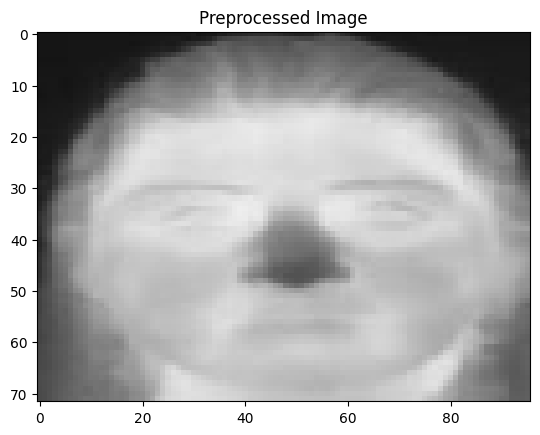

In [ ]:
# Optional: Visualize the preprocessed image
def visualize_preprocessed_image(image_path):
    preprocessed_image = preprocess_image(image_path)[0]  # Remove the batch dimension
    plt.imshow(preprocessed_image)
    plt.title("Preprocessed Image")
    plt.show()

visualize_preprocessed_image(test_image_path)